# Project2: The plan for Project2  should be the following 

   ## 1.   Business Understanidng 


  ##  2. First, we download your own  dataset and Know your dataset.
  
  
  ## 3. Next,  do some preliminary analysis of the data(EDA).
  

  
  ## 4. Implement a linear regression model or Linear Regression Model 
  
  
  ## 5. Model Evaluation-Evaluate your Model Performance 
  
  ##  6. Conclusion
  
  

# Step1: Building the Test and Development Environment 

In [5]:
conda install -c conda-forge imbalanced-learn

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [6]:
conda install -c conda-forge prettytable

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [130]:
conda install -c conda-forge xgboost

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [129]:
import pandas as pd
import numpy as np  
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from prettytable import PrettyTable
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import time
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Step2: Getting the Dataset 

In [10]:
 # Read the data set as a Pandas DataFrame as "data"
    data=

In [4]:
#Figure out the time taken to read the datasets with the majix 
%%time
import pandas as pd 

data=pd.read_csv(r'C:\Users\chala\Downloads\employee_promotionMODIFIED (1).csv')

Wall time: 31.7 s


In [6]:
%%time
data

Wall time: 0 ns


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,text_field,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,Tolstoy was instrumental in bringing a new kin...,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,Tolstoy was instrumental in bringing a new kin...,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,Tolstoy was instrumental in bringing a new kin...,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,Tolstoy was instrumental in bringing a new kin...,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,Tolstoy was instrumental in bringing a new kin...,45,3.0,2,0,73.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931731,3030,Technology,region_14,Bachelor's,m,sourcing,1,Tolstoy was instrumental in bringing a new kin...,48,3.0,17,0,78.0,0
931732,74592,Operations,region_27,Master's & above,f,other,1,Tolstoy was instrumental in bringing a new kin...,37,2.0,6,0,56.0,0
931733,13918,Analytics,region_1,Bachelor's,m,other,1,Tolstoy was instrumental in bringing a new kin...,27,5.0,3,0,79.0,0
931734,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,Tolstoy was instrumental in bringing a new kin...,29,1.0,2,0,NaN,0


In [12]:
data.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78.0,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56.0,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79.0,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,NaN,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.0,5,0,49.0,0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


In [14]:
data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [15]:
print('length of the data is' , len(data))

length of the data is 54808


In [16]:
data.shape

(54808, 13)

In [17]:
#Checking  Null values/missing values
np.sum(data.isnull().any (axis=1))

8428

# Step3:  Data Exploration

In [18]:
# Count of missing values in each column
data.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score      2560
is_promoted                0
dtype: int64

In [19]:
#Rows and Columns 
print('Count of Columns in the data is:  ', len(data.columns))

Count of Columns in the data is:   13


In [20]:
# Data Description
print('Count of rows in the data is:', len(data))

Count of rows in the data is: 54808


In [21]:
data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,52248.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.712238,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.521910,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,77.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


In [2]:
# Univeriate Analysis
# Numeric features distribution

data.hist(figsize=(20,20),bins = 20, color="#107009AA")
plt.title("Numeric Features Distribution")
plt.show()

NameError: name 'data' is not defined

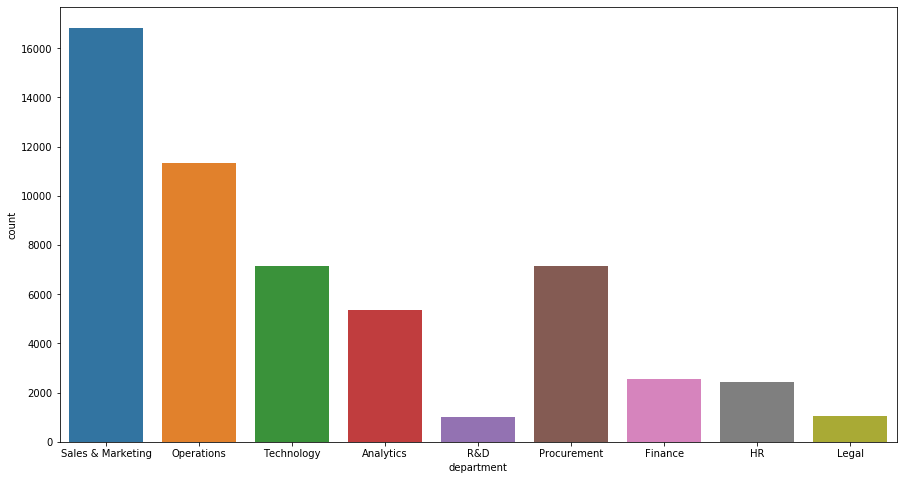

In [23]:
sns.countplot(data= data,  x = "department")
plt.gcf().set_size_inches(15, 8)
plt.show()

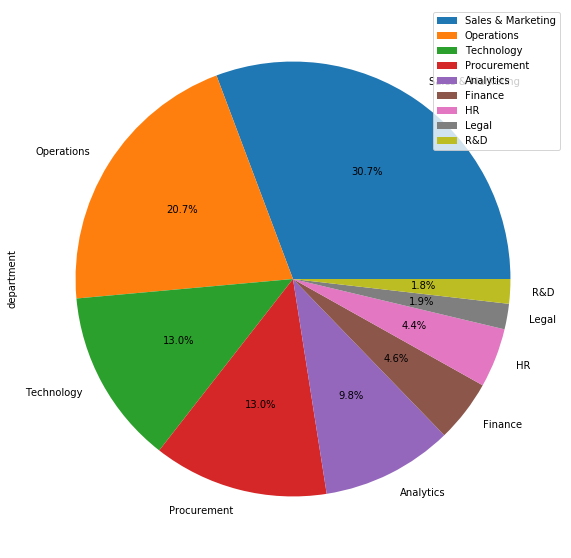

In [24]:
#To View the Sales and Marketing Team

data["department"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(10, 10)).legend()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 <a list of 34 Text xticklabel objects>)

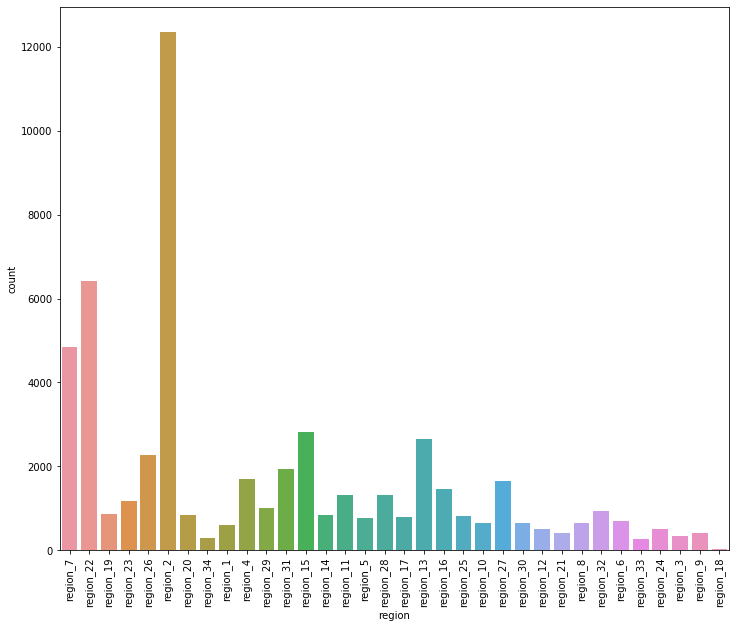

In [25]:
# Region Distribution
plt.figure(figsize=(12,10))
sns.countplot(data.region)
plt.xticks(rotation=90)

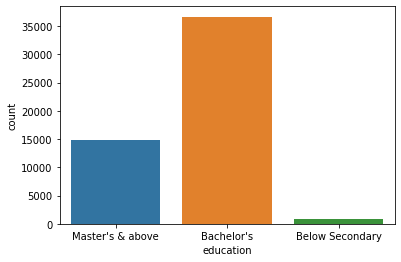

In [26]:
# Education
sns.countplot(data= data, x = "education")
plt.show()

In [45]:
data["is_promoted"].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

# We can clearly see that, the data is not balanced. The promoted employees are only 4668 and not promoted employees are 50140. 91% and 9% ratio is very unbalanced.


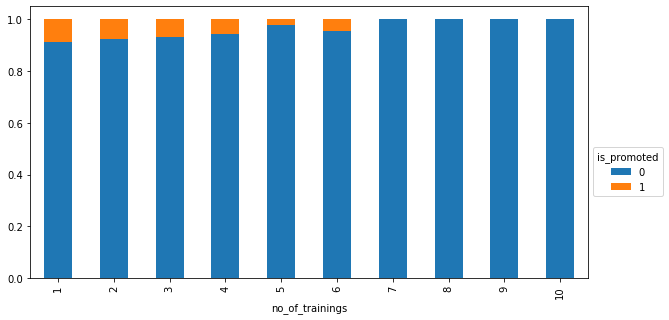

In [46]:
plt.rcParams['figure.figsize'] = [10, 5]
score_bin = pd.crosstab(data.no_of_trainings,data.is_promoted,normalize='index')
score_bin.plot.bar(stacked=True)
plt.legend(title='is_promoted',loc='upper left',bbox_to_anchor=(1, 0.5))

#  Feature Engineering

In [51]:
#Checking categorical type columns in the data
data.select_dtypes(include='object')

,department,region,education,gender,recruitment_channel
0,Sales & Marketing,region_7,Master's & above,f,sourcing
1,Operations,region_22,Bachelor's,m,other
2,Sales & Marketing,region_19,Bachelor's,m,sourcing
3,Sales & Marketing,region_23,Bachelor's,m,other
4,Technology,region_26,Bachelor's,m,other
...,...,...,...,...,...
54803,Technology,region_14,Bachelor's,m,sourcing
54804,Operations,region_27,Master's & above,f,other
54805,Analytics,region_1,Bachelor's,m,other
54806,Sales & Marketing,region_9,NaN,m,sourcing


In [52]:
#Encoding these categorical features into numeric type

pro= preprocessing.LabelEncoder()
encpro=pro.fit_transform(data['department'])
data['department'] = encpro

pro= preprocessing.LabelEncoder()
encpro=pro.fit_transform(data['region'])
data['region'] = encpro

pro= preprocessing.LabelEncoder()
encpro=pro.fit_transform(data['education'].astype(str))
data['education'] = encpro

pro= preprocessing.LabelEncoder()
encpro=pro.fit_transform(data['gender'])
data['gender'] = encpro

pro= preprocessing.LabelEncoder()
encpro=pro.fit_transform(data['recruitment_channel'].astype(str))
data['recruitment_channel'] = encpro

pro= preprocessing.LabelEncoder()
encpro=pro.fit_transform(data['recruitment_channel'])
data['recruitment_channel'] = encpro

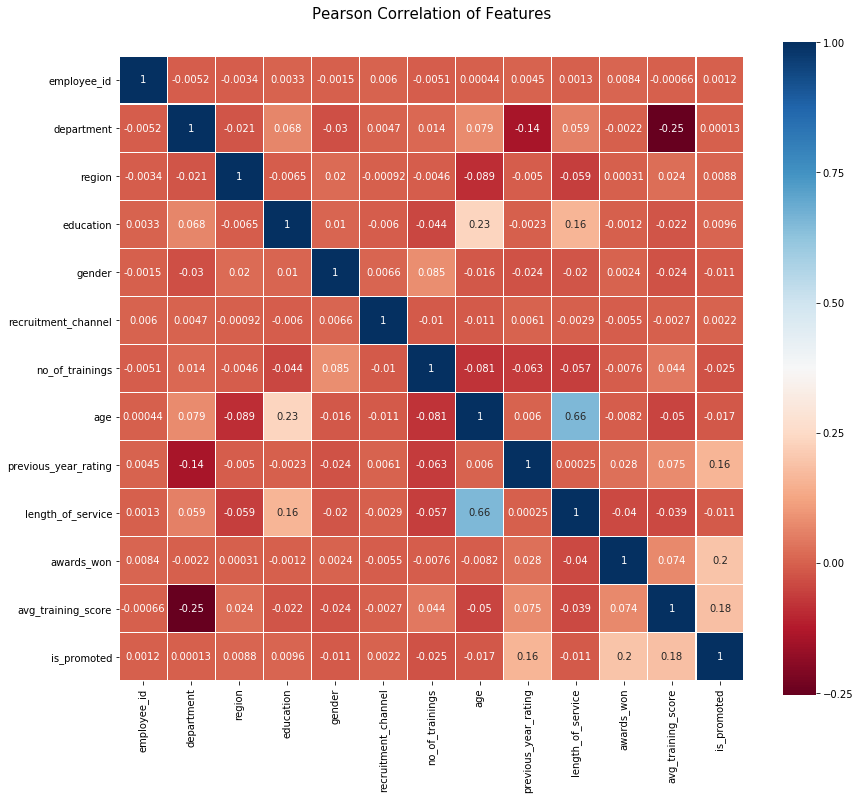

In [53]:
#Bivariate Analysis
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

### promoted target is good correlated with the following features:
# employee Id
# deparment
# region
# education
# recruitement_channel
# previous year rating
# awards won
# avg training score
# promoted target is not good correlated with the following features:¶
# gender
# no of training
# age
# length of service

In [70]:
#Missing value Treatment
data.isnull().sum()

department                 0
region                     0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score      2560
is_promoted                0
dtype: int64

# Handling Missing Values

In [71]:
data.isnull().sum().sum()/len(data)

0.12195299956210773

In [72]:
#lets calculate the total missing values in the each column
data_total = data.isnull().sum()
data_percent = ((data.isnull().sum()/data.shape[0])*100).round(2)
missing_data = pd.concat([data_total, data_percent],
                                axis=1, 
                                keys=['Train_Total', 'Train_Percent %','Test_Total', 'Test_Percent %'],
                                sort = True)
missing_data.style.bar(color = ['gold'])


,Train_Total,Train_Percent %
age,0,0.000000
avg_training_score,2560,4.670000
awards_won,0,0.000000
department,0,0.000000
education,0,0.000000
gender,0,0.000000
is_promoted,0,0.000000
length_of_service,0,0.000000
no_of_trainings,0,0.000000
previous_year_rating,4124,7.520000


In [73]:
#working on the previous_year_rating
py=data[data['previous_year_rating'].isnull()]
py.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
10,8,15,3,1,2,1,30,NaN,1,0,77.0,0
23,5,29,0,1,0,1,27,NaN,1,0,70.0,0
29,7,28,0,1,2,1,26,NaN,1,0,44.0,0
56,7,24,0,0,0,1,29,NaN,1,0,49.0,0
58,7,7,0,1,0,2,27,NaN,1,0,47.0,0


In [ ]:
py['length_of_service'].value_counts()

#### Since the length of service is 1 for all the employees with previous year rating as null.,which means they are the new recruits with 1 year experience. So they may not be having the previous year rating.We impute 0 for the null values.

In [74]:
data['previous_year_rating'].fillna(value=0,inplace=True)

In [75]:
#Working on the Education and Previous_Year_rating
data['education'] = data['education'].fillna(data['education'].mode()[0])
data['avg_training_score'] = data['avg_training_score'].fillna(data['avg_training_score'].mode()[0])

In [76]:
data.isnull().sum() #Now we dont have any any missing values in the features.

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
is_promoted             0
dtype: int64

### Target : Target are the Results like in this project 1 and 0 are Target.
### Inputs :Inputs are the data features that we feed into model like in this project department, region,education,gender are the inputs.
### Training Data We use training data when we train the models. We feed train data to tensorflow model so that model can learn from the data.
### Testing Data
We use testing data after training the model. We use this data to evalaute the performance that how the model perform after training. So in this way first we get predictions from the trained model without giving the Target and then we compare the true Target with predictions and get the performance of the model.



## Separating input feature and label

In [77]:
X=data.drop(columns=['is_promoted'])
y=data['is_promoted']

In [78]:
X.head()
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_promoted, dtype: int64

# Step4:  Model building - Logistic Regression(Random Forest Clssfier Model)

In [79]:
smt = SMOTE()
X_up, y_up = smt.fit_resample(X, y)

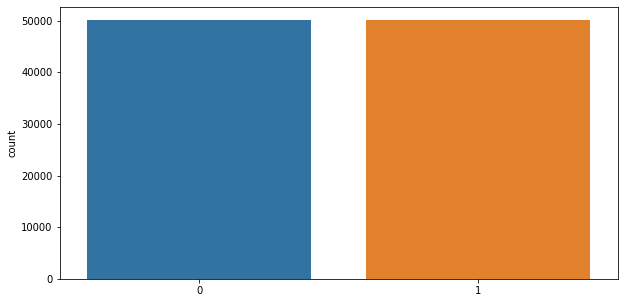

In [80]:
sns.countplot(data= data, x = y_up)

### Separating the 70% data for training data and 30% for testing data
### As we prepared all the data, now we are separating/splitting the all data into training data and testing data.

##### 70% data will be used in the training
#### 30% data will be used to test the performance of the model.

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X_up, y_up, test_size=0.3, random_state=2)

In [83]:
#Training the Random Forest Model
LR=RandomForestClassifier()
LR= LR.fit(X_train , y_train)
LR

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# Step5: Evaluation of Trained model on test data


### Accuracy is the number of correctly classify the promoted and notpromoted.
### Accuracy= Total number of correct predictions/Total number of predictions

In [84]:
print('Test set\n  Accuracy: {:0.2f}'.format(LR.score(X_test, y_test))) #the accuracy of the model on test data is given below

Test set
  Accuracy: 0.96


In [85]:
y_pred = LR.predict(X_test) #getting predictions on the trained model

### Precision Score on test data
### Precision measure the number of positive class predictions that actually belong to the positive class

In [86]:
print('Precision',round(f1_score(y_test, y_pred, average='micro'),3),'%')

Precision 0.957 %


## Recall Score on test data
### Recall measures the number of positive class predictions made out of all positive records in the dataset

In [87]:
print('Recall',round(recall_score(y_test, y_pred, average='micro'),4),'%')

Recall 0.9569 %


# Step6: Conclusion 

The model is giving good results and taking reasonable time on training. 96% accuracy is good but still we can improve the model with different techniques of machine learning.